### Hello and welcome!

### We will now be developing a Sentiment Analysis based Recommender System.

#### We will first compute the polarity for reviews individually, then classify them as positive, negative or neutral, so as to analyze our dataset better.

#### After this, we will be establishing relationships between the products, so that we can obtain desired results based on a search prompt.

### Let us begin!

In [3]:
import pandas as pd
import numpy as np
from textblob import TextBlob

# Step 1: Getting the Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ISTE Recommender System and Sentiment Analysis workshop/Day 2/flipkart_product.csv',encoding="unicode_escape")

In [6]:
df.head()

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product


### Let us drop the empty rows from the dataset

In [7]:
df.dropna(inplace=True)

In [8]:
df.Rate.unique()

array(['5', '3', '1', '4', '2',
       'Pigeon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Silver, Black)',
       'Bajaj DX 2 L/W Dry Iron',
       'Nova Plus Amaze NI 10 1100 W Dry Iron?ÿ?ÿ(Grey & Turquoise)', 's'],
      dtype=object)

### Removing noisy data from ratings

In [9]:
df=df.drop(df.loc[df.Rate.isin(['Pigeon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Silver, Black)',
       'Bajaj DX 2 L/W Dry Iron',
       'Nova Plus Amaze NI 10 1100 W Dry Iron?ÿ?ÿ(Grey & Turquoise)', 's'])].index)
df.Rate=df.Rate.astype(int)

# Step 2: Data Preprocessing

### First let us convert the text to lower case for easier analysis.

In [10]:
df.Review=df.Review.str.lower()

### Removing punctuation marks from the text data will make it easier for the model to detect.

In [11]:
import string
translator=str.maketrans('', '', string.punctuation)
df.Review=df.Review.str.translate(translator)

In [12]:
df.Review

0                   super
1                 awesome
2                    fair
3         useless product
4                    fair
               ...       
189868           terrific
189869           terrific
189870           terrific
189871           just wow
189872    worth the money
Name: Review, Length: 189853, dtype: object

# Step 3: Sentiment Analysis
### Now we will run a pretrained model for sentiment analysis using textblob library on the 'Review' column

In [13]:
l=[]
for i in df.Review:
    processed=TextBlob(i)
    l.append(processed.sentiment.polarity)

In [14]:
df['polarity(Review)']=l

### Let us display the text with our newly added column for Polarity

In [15]:
df

,ProductName,Price,Rate,Review,Summary,polarity(Review)
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,super,Great cooler.. excellent air flow and for this...,0.333333
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,awesome,Best budget 2 fit cooler. Nice cooling,1.000000
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,fair,The quality is good but the power of air is de...,0.700000
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,useless product,Very bad product it's a only a fan,-0.500000
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,fair,Ok ok product,0.700000
...,...,...,...,...,...,...
189868,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,terrific,Good,0.000000
189869,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,terrific,Thanks,0.000000
189870,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,terrific,Good,0.000000
189871,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,just wow,Super,0.100000


### Now we work with the 'Summary' column

In [16]:
df.Summary=df.Summary.str.lower()

In [17]:
import string
translator=str.maketrans('', '', string.punctuation)
df.Summary=df.Summary.str.translate(translator)

In [18]:
df.Summary

0         great cooler excellent air flow and for this p...
1                     best budget 2 fit cooler nice cooling
2         the quality is good but the power of air is de...
3                         very bad product its a only a fan
4                                             ok ok product
                                ...                        
189868                                                 good
189869                                               thanks
189870                                                 good
189871                                                super
189872                                                 good
Name: Summary, Length: 189853, dtype: object

### Once again, we run a pretrained model for sentiment analysis on the 'Summary' column

In [19]:
l=[]
for i in df.Summary:
    processed=TextBlob(i)
    l.append(processed.sentiment.polarity)

In [20]:
df['polarity(Summary)']=l

In [21]:
df

,ProductName,Price,Rate,Review,Summary,polarity(Review),polarity(Summary)
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,super,great cooler excellent air flow and for this p...,0.333333,0.725000
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,awesome,best budget 2 fit cooler nice cooling,1.000000,0.666667
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,fair,the quality is good but the power of air is de...,0.700000,0.433333
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,useless product,very bad product its a only a fan,-0.500000,-0.455000
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,fair,ok ok product,0.700000,0.500000
...,...,...,...,...,...,...,...
189868,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,terrific,good,0.000000,0.700000
189869,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,terrific,thanks,0.000000,0.200000
189870,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,terrific,good,0.000000,0.700000
189871,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,just wow,super,0.100000,0.333333


### We now remove unwanted characters from Price column using the Regular Expression (re) library

In [22]:
import re
def remove_chars(x):
    s=re.sub("[^0-9]","",x)
    return s
df.Price=df.Price.apply(remove_chars).astype(int)

In [23]:
X=df.drop(['Review','Summary'],axis=1)

In [24]:
X=X.groupby(by='ProductName').mean()

In [25]:
X

,Price,Rate,polarity(Review),polarity(Summary)
ProductName,,,,
1170-BL-BR Unique New Day & Date Analog Watch - For Men,299.0,3.986667,0.000000,0.426187
38024PP25 Minimalists Analog Watch - For Men,850.0,4.888889,0.000000,0.508954
"3D METRO SUPER STORE JUICER_Gduumy 1 Juicer,1 Handle,1 Jar,1 Glass 0 Juicer (1 Jar, Green)",417.0,3.670000,0.178250,0.311912
"3D METRO SUPER STORE METRO_MIXER Pro 0 Juicer (1 Jar, Multicolor)",199.0,4.750000,0.560476,0.503702
77085PP03 Volt Analog Watch - For Men,699.0,4.711111,0.000000,0.523057
...,...,...,...,...
the indian casa Cricket Net 10x20 Feet Nylon Cricket Boundary And Practice Net (Green) Cricket NetÂ Â (Green),340.0,3.923077,0.253846,0.265330
"thos 5 Layer Simple Bookshelf/Multipurpose Rack/Children Bookcases/File Rack for Office/Storage Organizer/Cabinet Shelves for Bedroom Office Living Room Metal Open Book ShelfÂ Â (Finish Color - Black, DIY(Do-It-Yourself))",785.0,3.385000,0.281775,0.267772
"thos 5 Layer Simple Bookshelf/Multipurpose Rack/Children Bookcases/File Rack for Office/Storage Organizer/Cabinet Shelves for Bedroom Office Living Room Metal Open Book ShelfÂ Â (Finish Color - Grey, DIY(Do-It-Yourself))",799.0,3.406897,0.297569,0.270470


### Based on the values of Polarity columns for Review & Summary, we classify them as positive, negative or neutral.

In [26]:
def sentiment(x):
    if x>0:
        return 'positive'
    elif x==0:
        return 'neutral'
    else:
        return 'negative'

In [27]:
X['polarity(Review)']=X['polarity(Review)'].apply(sentiment)
X['polarity(Summary)']=X['polarity(Summary)'].apply(sentiment)

# Step 4: Enabling searching of Products by correlating

### In this final section, we will establish relationships between similar products based on product names. We will do this using the TF-IDF Vectorizer and Cosine Similarity, present in the Sklearn Library.

TF-IDF Vectorizer:

Let’s cover an example of 3 documents -
Document 1 It is going to rain today.

Document 2 Today I am not going outside.

Document 3 I am going to watch the season premiere.

Clean the Data and get the Frequency:

  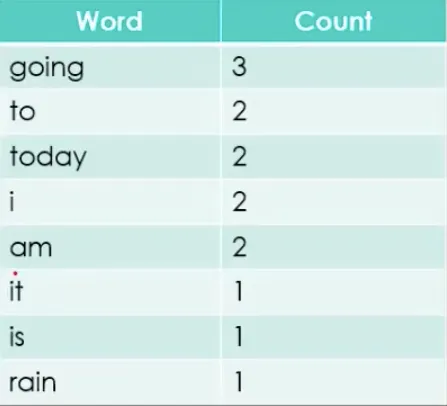

  Term Frequency:

  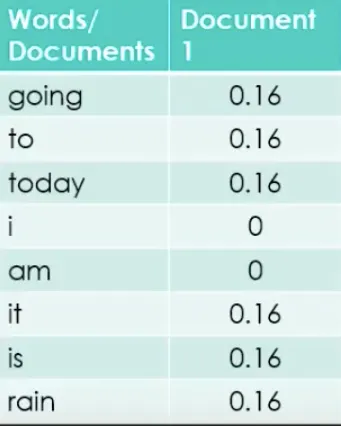
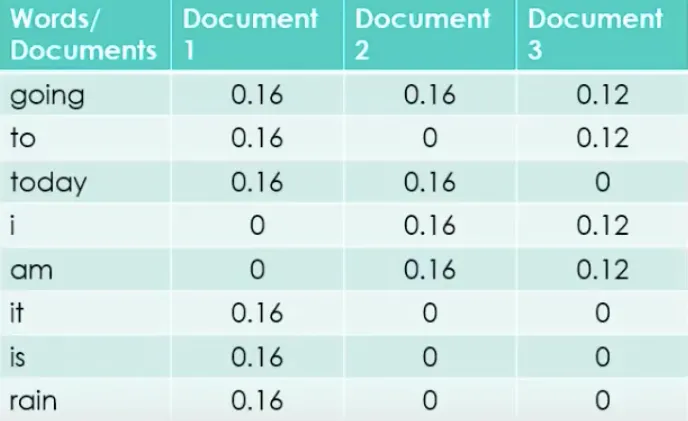

Inverse Document Frquency:

  IDF =Log[(Number of documents) / (Number of documents containing the word)]

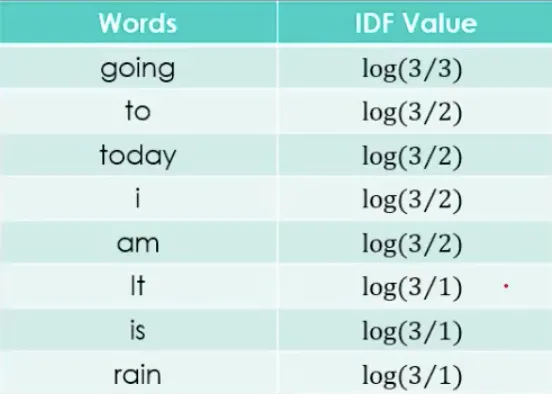

TF-IDF = TF * IDF

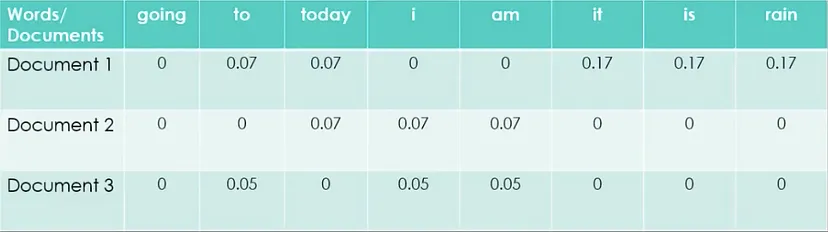


In [28]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def product_similarity(x,X):
# Convert the texts into TF-IDF vectors
    l=[]
    name=[]
    vectorizer = TfidfVectorizer()


    for i in X:
        vectors=vectorizer.fit_transform([str(x),i])

# Calculate the cosine similarity between the vectors
        l.append( cosine_similarity(vectors)[0][1])
        name.append(i)

    return pd.DataFrame({'Similarity':l},index=name)
sim=product_similarity(X.index[20],X.index)

### Establishing such relationships between product names will enable us to search for products based on keywords, as we will see below.

### Ordinarily, on e-commerce websites, we search for keywords of products we are interested in and expect related results to show up. That search engine works similar to the Cosine Similarity model that we just created.

### Now for example, we will search for a keyword, say 'watch'. If our model works correctly, we will see results relating to watches.

In [29]:
def get_recommendations(s):
  sim2=product_similarity(s,X.index)
  X_sim2=pd.concat([X.loc[X.index.isin(sim2.index)],sim2],axis=1)
  return X_sim2.loc[(X_sim2['Similarity']>0.15) & (X_sim2['polarity(Summary)']=='positive') ]

In [34]:
s=input('Search: ')
get_recommendations(s)

Search: watch


['1170-BL-BR Unique New Day & Date Analog Watch  - For Men',
 '38024PP25 Minimalists Analog Watch  - For Men',
 '77085PP03 Volt Analog Watch  - For Men',
 "DBRW385-DBRWN Day and Date Boy's & Man's Stylish Analog Day & Date Analog Watch  - For Men",
 'FULL BLACK FANCY DIAL SPORT PU BELT WATCH & KING BRECELET PACK OF 3 Analog Watch  - For Men',
 'HL-2022 New Trending Full Black Round Waterproof Gym Fitness Freek HL-2022-DTL Digital Watch  - For Men',
 'ICECLOUD Smart Watch 2 Pins Magnetic Suction Charger Cable Compatible Charging Pad',
 'KJR_32 KJR_32 Analog Watch  - For Men',
 'LCS-8188 TRENDING DAY & DATE FUNCTIONING Analog Watch  - For Men',
 'LS2727 Avatar Day and Date Functioning Crocodile Strap Analog Analog Watch  - For Men',
 'LS2734 Wolf Gents Exclusive Mesh Strap Analog Analog Watch  - For Men',
 'LS2821 Bleed Blue Day and Date Functioning Strap Adult Quartz Analog Watch  - For Men',
 'LS2917 Mesh Strap All Black Avatar Day and Date Functioning Quartz Analog Watch  - For Men',


### As expected, we obtain desired results based on our search prompt. Hence, our Sentiment Analysis based Recommender System has been successfully developed.

### We encourage you to experiment and develop a similar system on datasets of your choice, for which you can find several online sources.
### Thank you!

In [31]:
!pip install anvil-uplink

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [32]:
import anvil.server
anvil.server.connect("server_RVMYBXZ4DGK5DGB2W5KQBAHF-AZUIXPHQFXJKHEL5")
import anvil.media
@anvil.server.callable
def get_recommendations(s):
    sim2=product_similarity(s,X.index)
    X_sim2=pd.concat([X.loc[X.index.isin(sim2.index)],sim2],axis=1)
    rec=X_sim2.loc[(X_sim2['Similarity']>0.15) & (X_sim2['polarity(Summary)']=='positive') ]
    l=[]
    for i in rec.index:
        l.append(i)
    return l

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER
